In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys,os,glob
import subprocess
sys.path.insert(0,'../src')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm,Normalize,SymLogNorm

# TIGRESS papers

* [Method](http://adsabs.harvard.edu/abs/2017ApJ...846..133K)
* [Outflow](http://adsabs.harvard.edu/abs/2018ApJ...853..173K)
* [Dust Polarization](http://adsabs.harvard.edu/abs/2019arXiv190107079K)

# example data and notebooks:

* example data files can be downloaded at [this URL](http://tigress-web.princeton.edu/~changgoo/TIGRESS_example_data/)
* [data reading notebook](https://nbviewer.jupyter.org/github/changgoo/tigress_example/blob/master/notebook/example_read_vtk.ipynb)
* [power spectrum notebook](https://nbviewer.jupyter.org/github/changgoo/tigress_example/blob/master/notebook/example_power_spectra.ipynb)
* [2D data notebook](https://nbviewer.jupyter.org/github/changgoo/tigress_example/blob/master/notebook/example_2D_data.ipynb) -- this one

# density projection
* The data files can be found under `proj/` folder
* The gas surface density is calculated by
$$\Sigma[j,i] = \sum_{k=0}^{N_z-1} \rho[k,j,i] \Delta z $$
and converted in units of $M_{\odot} \,{\rm pc^{-2}}$.

# density slices
* The data files can be found under `slices/` folder
* The density slices at $z=0$, 0.5, and 1.0 kpc are separately stored in files end with **{}.z0.0p**, **{}.z0.5.p**, and **{}.z1.0.p**, respectively.
* The data is the hydrogen number density in units of ${\rm cm}^{-3}$.

In [4]:
proj_folder='/tigress/changgoo/public_html/TIGRESS_example_data/proj/'
slice_folder='/tigress/changgoo/public_html/TIGRESS_example_data/slices/'
pid='MHD_4pc_new'

In [5]:
import pickle as p

In [6]:
proj_files=glob.glob('{}{}.????.surf.p'.format(proj_folder,pid))
print(len(proj_files))

702


In [7]:
# data file contains a dictionary with 'data', 'bounds', and 'time'
itime = 100
surf = p.load(open('{}{}.{:04d}.surf.p'.format(proj_folder,pid,itime),'rb'))
surf

{'data': array([[10.87369747, 11.0093912 , 10.90741872, ..., 14.84518049,
         14.45566737, 14.62703642],
        [11.51713246, 11.65776611, 11.57499537, ..., 15.18754509,
         15.1298837 , 15.32073516],
        [12.08721695, 12.21476829, 12.09606118, ..., 15.31952007,
         15.5239514 , 15.81809408],
        ...,
        [ 9.45570668,  9.71389741,  9.80060611, ..., 13.92037767,
         13.26266957, 13.14857581],
        [ 9.81730262, 10.015922  ,  9.97085367, ..., 14.0662607 ,
         13.42236097, 13.4140664 ],
        [10.2761612 , 10.42465128, 10.31151809, ..., 14.37319744,
         13.78623252, 13.91134702]]),
 'bounds': array([-512.,  512., -512.,  512.]),
 'time': array(97.77990661)}

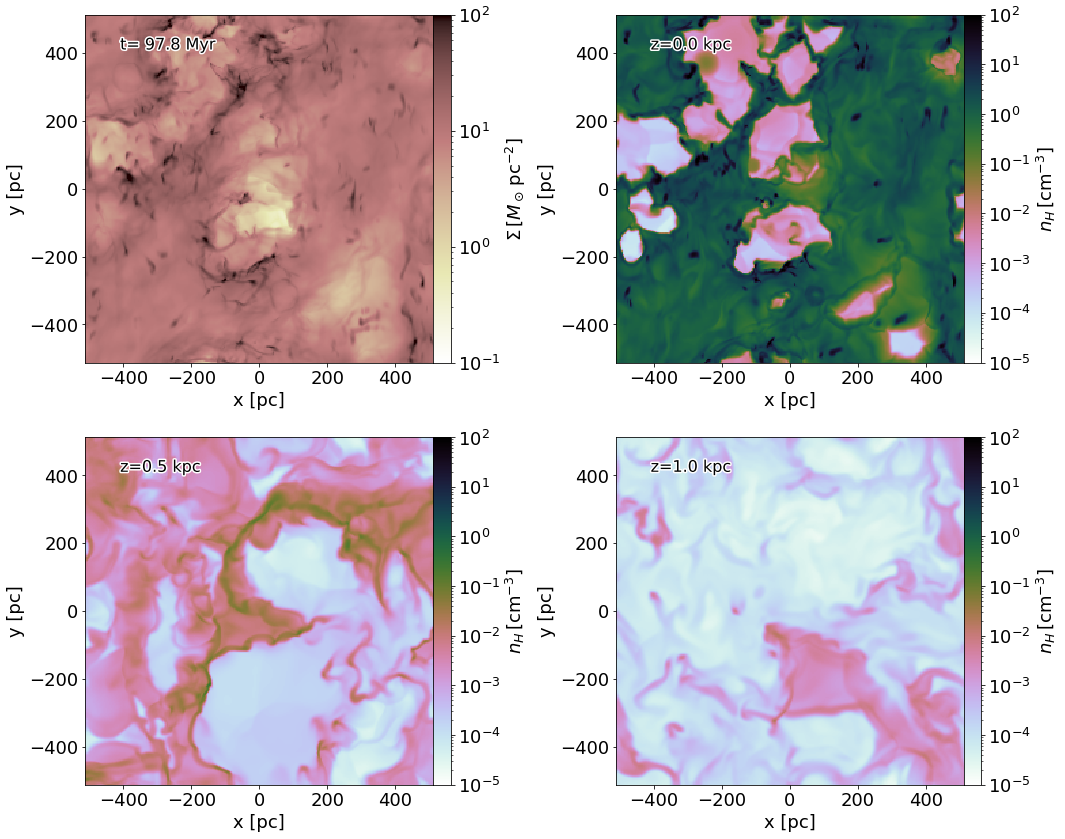

In [9]:
# example visualization
def texteffect(fontsize=16):
    try:
        from matplotlib.patheffects import withStroke
        myeffect = withStroke(foreground="w", linewidth=3)
        kwargs = dict(path_effects=[myeffect], fontsize=fontsize)
    except ImportError:
        kwargs = dict(fontsize=fontsize)
    return kwargs

itime = 100

surf = p.load(open('{}{}.{:04d}.surf.p'.format(proj_folder,pid,itime),'rb'))
slc00 = p.load(open('{}{}.{:04d}.dslice.z0.0.p'.format(slice_folder,pid,itime),'rb'))
slc05 = p.load(open('{}{}.{:04d}.dslice.z0.5.p'.format(slice_folder,pid,itime),'rb'))
slc10 = p.load(open('{}{}.{:04d}.dslice.z1.0.p'.format(slice_folder,pid,itime),'rb'))
extent=surf['bounds']

plt.rcParams['font.size']=18
fig, axes = plt.subplots(2,2,figsize=(15,12))

# surface density
ax=axes[0,0]
im=ax.imshow(surf['data'],extent=extent,norm=LogNorm(1.e-1,1.e2),cmap=plt.cm.pink_r)
plt.colorbar(im,ax=ax,pad=0,label=r'$\Sigma\,[M_\odot\,{\rm pc}^{-2}]$')
ax.text(0.1,0.9,'t={:5.1f} Myr'.format(surf['time']),transform=ax.transAxes,**texteffect())
# slices
for ax,slc,z0 in zip(axes.flat[1:],[slc00,slc05,slc10],[0.0,0.5,1.0]):
#ax=axes[0,1]
    im=ax.imshow(slc['data'],extent=extent,norm=LogNorm(1.e-5,1.e2),cmap=plt.cm.cubehelix_r)
    plt.colorbar(im,ax=ax,pad=0,label=r'$n_H\,[{\rm cm}^{-3}]$')
    ax.text(0.1,0.9,'z={} kpc'.format(z0),transform=ax.transAxes,**texteffect())

plt.setp(axes,'xlabel','x [pc]')
plt.setp(axes,'ylabel','y [pc]')
plt.tight_layout()